In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import colorcet as cc  # for colourblind-friendly palettes

In [9]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\Joe\OneDrive\Documents\250608_Car_Emissions/cars_public - cars.csv", on_bad_lines='skip')

In [11]:
# Clean column names (removes leading/trailing spaces)
df.columns = df.columns.str.strip()

In [12]:
# Filter for Euro 6, Volkswagen, and Manual Transmission (e.g., 'M5', 'M6', etc.)
euro6_df = df[df['Euro'].astype(str).str.contains('6', na=False)]
vw_mt_df = euro6_df[
    (euro6_df['Make'].str.lower() == 'volkswagen') &
    (euro6_df['Transmission'].str.upper().str.startswith('M'))
]

In [13]:
# Preview filtered data
print(vw_mt_df[['Make', 'Model', 'Transmission', 'Euro']].head())

           Make          Model Transmission Euro
315  Volkswagen           Golf           M6    6
441  Volkswagen       New Polo           M5   6b
442  Volkswagen  Passat Saloon           M6    6
480  Volkswagen  Passat Saloon           M6    6
533  Volkswagen  Passat Estate           M6    6


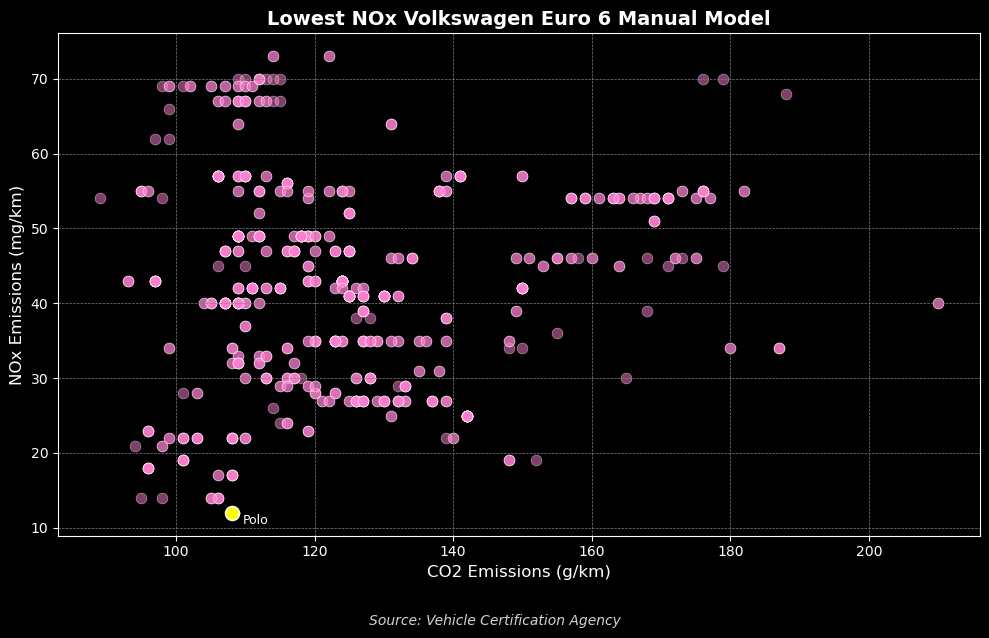

In [18]:
# Set style
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Re-plot all points (faded)
# Plot all points
plt.scatter(
    vw_mt_df['CO2'],
    vw_mt_df['NOx'],
    color=cc.glasbey[5],
    s=60,
    alpha=0.5,
    edgecolor='white',
    linewidth=0.5
)

# Get top NOx car
lowest_nox = vw_mt_df.nsmallest(1, 'NOx')

# Plot yellow highlight last
plt.scatter(
    lowest_nox['CO2'],
    lowest_nox['NOx'],
    color='yellow',
    edgecolor='white',
    s=100,
    linewidth=1.2,
    zorder=5
)

# Label it near the dot without hitting the border
for _, row in lowest_nox.iterrows():
    plt.annotate(
        row['Model'],
        (row['CO2'], row['NOx']),
        xytext=(8, -8),
        textcoords='offset points',
        fontsize=9,
        color='white',
        ha='left',
        arrowprops=dict(arrowstyle='->', color='white', lw=0.5)
    )

# Finish up
plt.title('Lowest NOx Volkswagen Euro 6 Manual Model', fontsize=14, weight='bold')
plt.xlabel('CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('NOx Emissions (mg/km)', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.figtext(0.5, -0.05, 'Source: Vehicle Certification Agency', ha='center', fontsize=10, style='italic', color='lightgray')
plt.tight_layout()
plt.savefig('vw_lowest_nox.png', dpi=300, bbox_inches='tight', facecolor='black')
plt.show()

In [20]:
print("""📊 1. General Pattern: Moderate Positive Correlation
In all charts:

As CO₂ emissions increase, NOx emissions tend to increase too — but not linearly.

There's a broad cloud between 100–160 g/km CO₂ and 20–55 mg/km NOx, indicating this is where most cars cluster.

This suggests that most Euro 6 manual Volkswagens balance NOx and CO₂ emissions within a fairly typical efficiency envelope.

🟡 2. Outliers:
🛑 High NOx Outlier:
Volkswagen Caddy Life BlueMotion has very high NOx (~73 mg/km) despite low-to-mid CO₂.

This contradicts expectations and stands out as a potential anomaly, either:
- Due to engine tuning
- Exhaust system configuration
- Or a potential real-world vs test condition gap

✅ Low NOx Outlier:
Volkswagen Polo has the lowest NOx (~13 mg/km) in the Euro 6 manual lineup, with ~112 g/km CO₂.

It's compact, likely petrol, and seems well optimized — a potential benchmark model for emissions performance.

📉 3. Clusters Suggesting Engine Family Types
There are horizontal bands (e.g. at 40, 55, 70 mg/km NOx) which could indicate:
- Shared engine platforms or emission control strategies used across multiple models
- Engine families grouped by emission performance rather than vehicle size

🚗 4. Few Cars at High CO₂ (>180)
Very few Euro 6 VW manual models emit >180 g/km CO₂ — likely indicating that high-displacement engines are either:
- Paired with automatic transmissions
- Or were dropped entirely from Euro 6 product lines

❗ 5. Non-linear Trade-offs
Some cars emit more CO₂ without much NOx gain, while others spike in NOx at moderate CO₂.

This suggests NOx control is not strictly tied to CO₂, and is more affected by combustion temperature, turbocharging, and after-treatment systems (like EGR or SCR).

📌 Summary:
Pattern                          Insight
🟡 Polo                         Best NOx performance (13 mg/km)
🔺 Caddy Life BlueMotion        Worst NOx (73+ mg/km)
💠 Clustered models             Horizontal NOx bands suggest common engine strategies
📉 CO₂ tail-off                 Very few models over 180 g/km CO₂
❗ Mixed tradeoffs              Some high CO₂ cars have mid NOx; not tightly coupled
""")

📊 1. General Pattern: Moderate Positive Correlation
In all charts:

As CO₂ emissions increase, NOx emissions tend to increase too — but not linearly.

There's a broad cloud between 100–160 g/km CO₂ and 20–55 mg/km NOx, indicating this is where most cars cluster.

This suggests that most Euro 6 manual Volkswagens balance NOx and CO₂ emissions within a fairly typical efficiency envelope.

🟡 2. Outliers:
🛑 High NOx Outlier:
Volkswagen Caddy Life BlueMotion has very high NOx (~73 mg/km) despite low-to-mid CO₂.

This contradicts expectations and stands out as a potential anomaly, either:
- Due to engine tuning
- Exhaust system configuration
- Or a potential real-world vs test condition gap

✅ Low NOx Outlier:
Volkswagen Polo has the lowest NOx (~13 mg/km) in the Euro 6 manual lineup, with ~112 g/km CO₂.

It's compact, likely petrol, and seems well optimized — a potential benchmark model for emissions performance.

📉 3. Clusters Suggesting Engine Family Types
There are horizontal bands (e.g.